In [1]:
from graphingFunctions import *
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, discriminant_analysis
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
# Read in the data as a dataframe
data_white = read_in_dataframe("C:\Users\Victoria\Downloads\winequality-white.csv", 0)
data_red = read_in_dataframe("C:\Users\Victoria\Downloads\winequality-red.csv", 1)

# Format the white data as np arrays
X_white = data_white.values[:, :-2]
y_white_quality = data_white.values[:, -2]
y_white_color = data_white.values[:, -1]

# Format the red data as np arrays
X_red = data_red.values[:, :-2]
y_red_quality = data_red.values[:, -2]
y_red_color = data_red.values[:, -1]

# Combining data into one set of np arrays
data = pd.concat([data_red, data_white])
X = np.concatenate((X_white, X_red))
y_quality = np.concatenate((y_red_quality, y_white_quality))
y_color = np.concatenate((y_red_color, y_white_color))

# Extract the labels
labels = list(data.columns.values)
labels = [labels[i].title() for i in range(len(labels))]

# Scale everything nicely
X_white_scale = preprocessing.scale(X_white)
X_red_scale = preprocessing.scale(X_red)
X_scale = preprocessing.scale(X)

C:\Users\Victoria\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


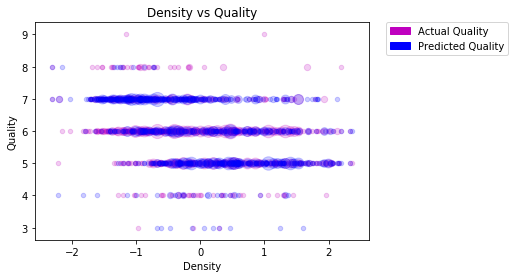

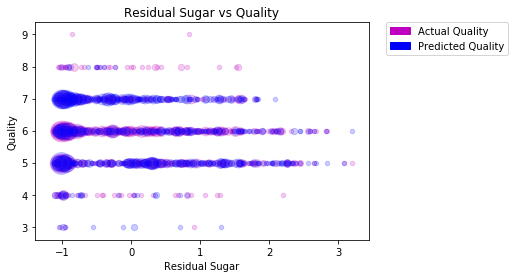

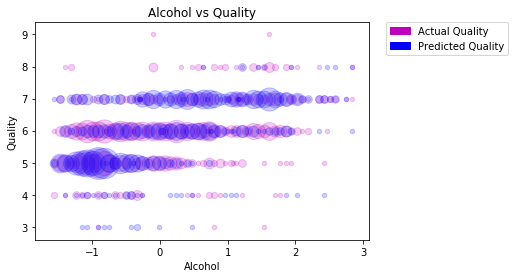

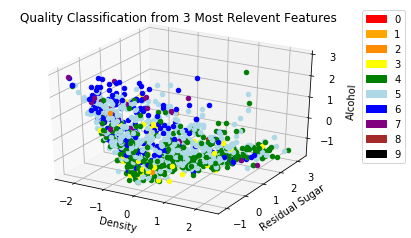

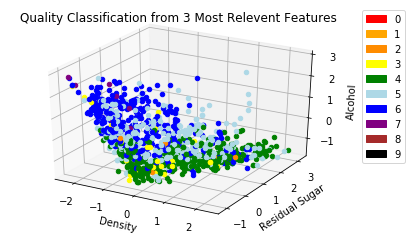

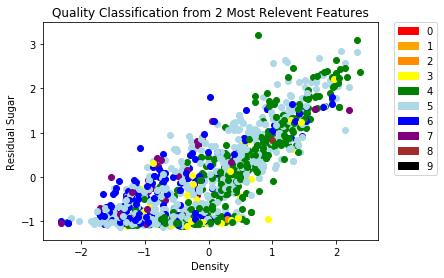

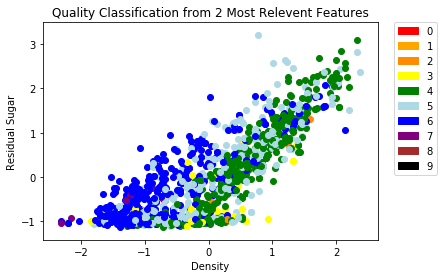

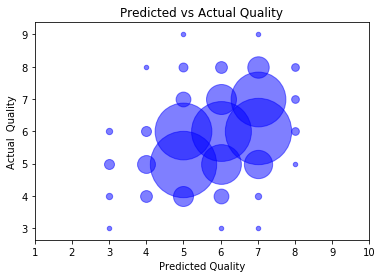

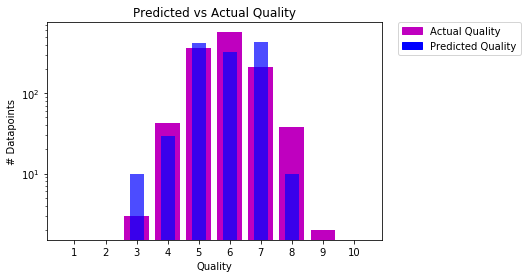


Mean squared error on training data: 0.85
Variance score (1 is perfect prediction): -0.14



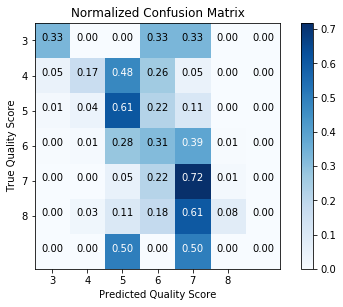

In [3]:
# Split up the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_white_scale, y_white_quality)

# Create & train the model
model = discriminant_analysis.QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the test data
y_predictions = model.predict(X_test)
y_predictions = [round(y_predictions[i]) for i in range(len(y_predictions))]

# Make some magic happen
print_all_graphs(X_test, y_test, y_predictions, labels, 'Quality', 'white')    

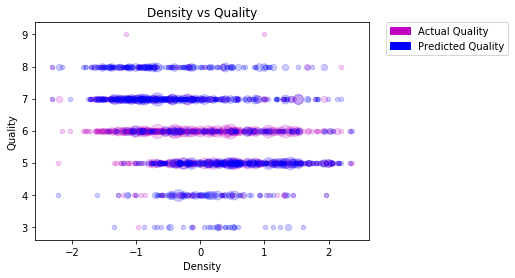

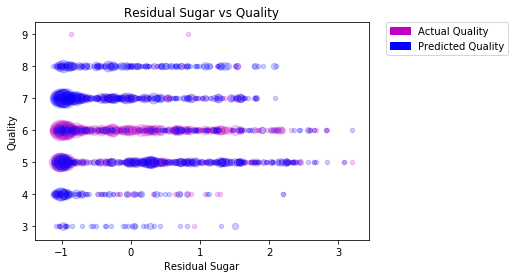

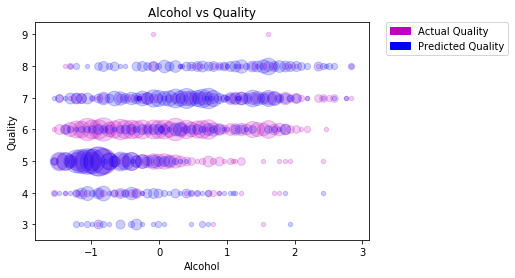

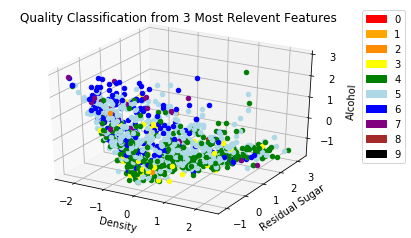

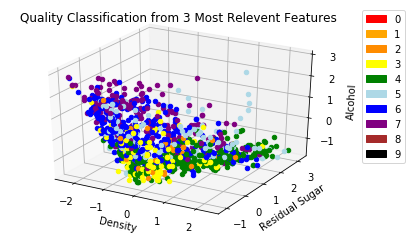

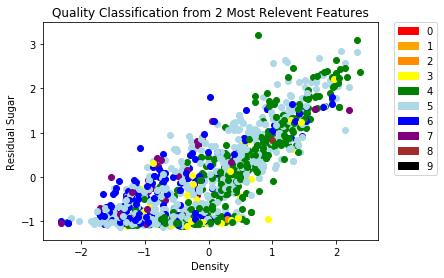

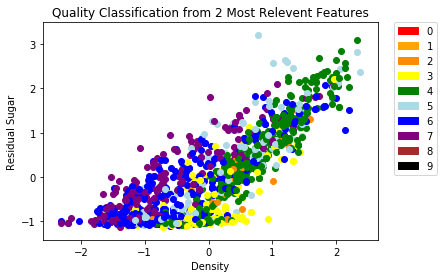

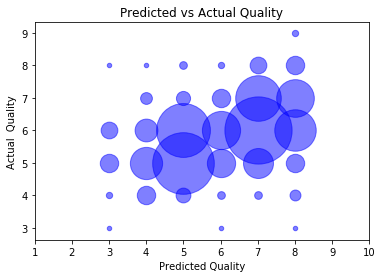

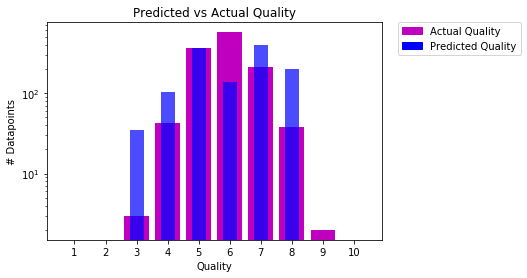


Mean squared error on training data: 1.55
Variance score (1 is perfect prediction): -1.08



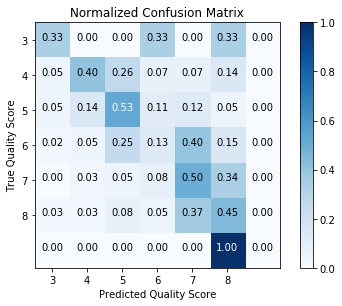

In [4]:
# Do oversampling on the data to give more diverse data
ros = RandomOverSampler(random_state = 0)
X_resample, y_resample = ros.fit_sample(X_train, y_train)

# Create & train the model
model = discriminant_analysis.QuadraticDiscriminantAnalysis()
model.fit(X_resample, y_resample)

# Make predictions on the test data
y_predictions = model.predict(X_test)
y_predictions = [round(y_predictions[i]) for i in range(len(y_predictions))]

# Make some magic happen
print_all_graphs(X_test, y_test, y_predictions, labels, 'Quality', 'white')    

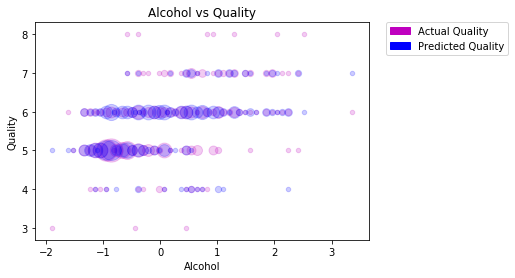

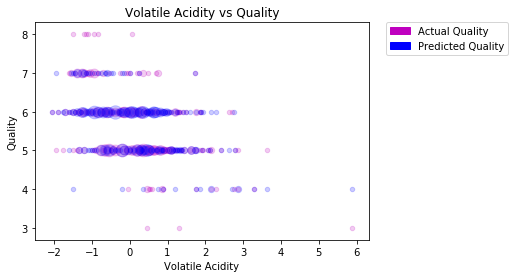

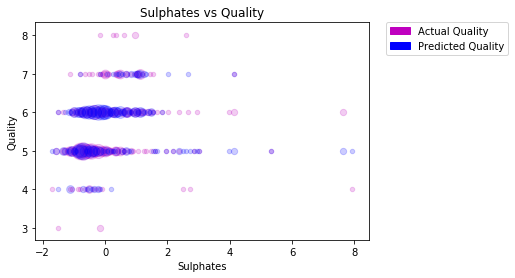

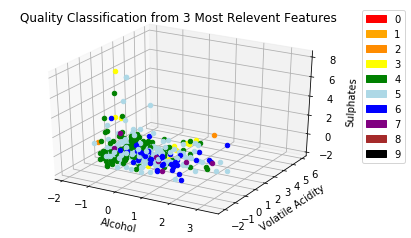

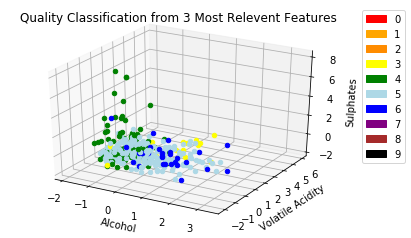

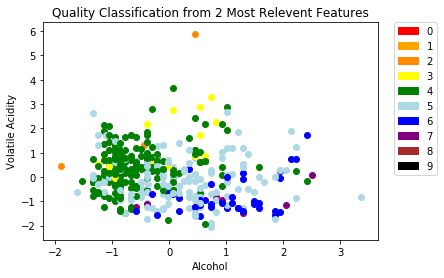

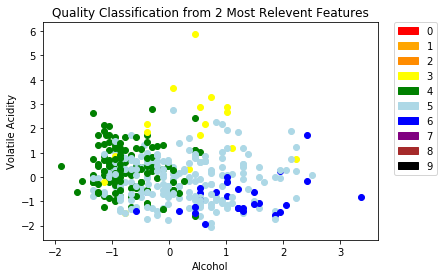

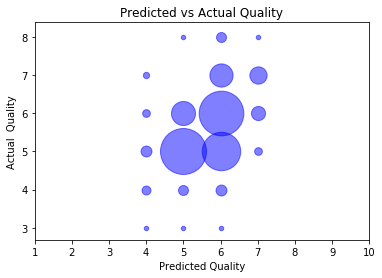

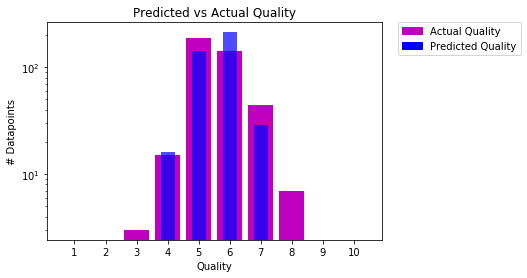


Mean squared error on training data: 0.65
Variance score (1 is perfect prediction): 0.05



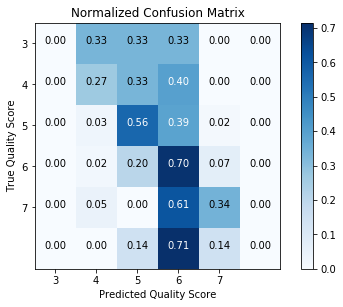

In [5]:
# Split up the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_red_scale, y_red_quality)

# Create & train the model
model = discriminant_analysis.QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the test data
y_predictions = model.predict(X_test)
y_predictions = [round(y_predictions[i]) for i in range(len(y_predictions))]

# Make some magic happen
print_all_graphs(X_test, y_test, y_predictions, labels, 'Quality', 'red')    

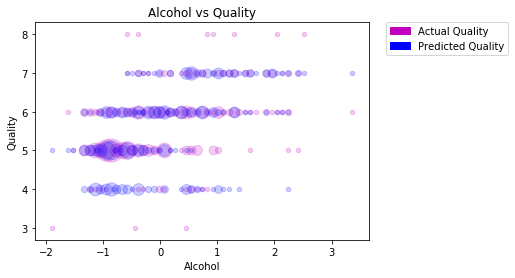

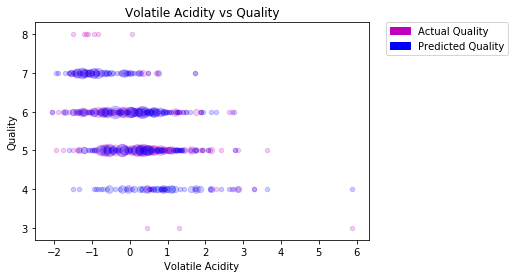

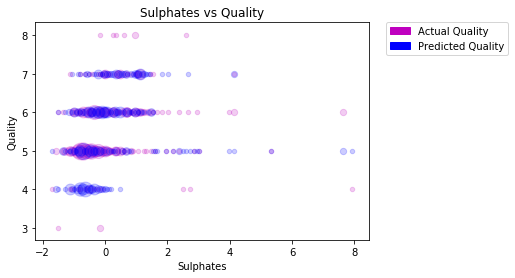

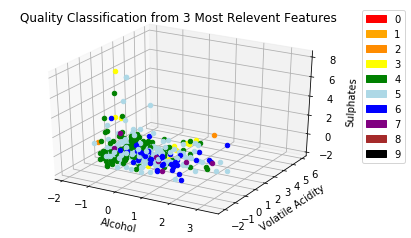

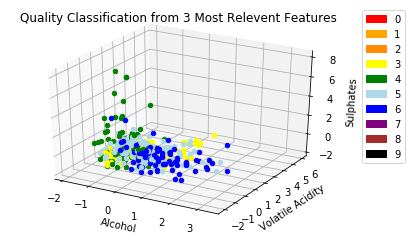

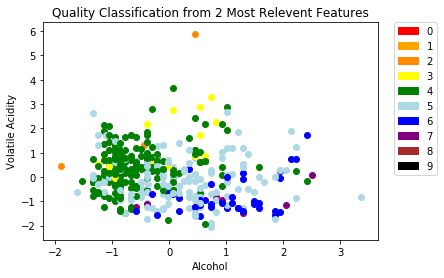

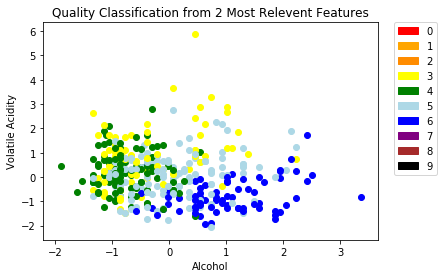

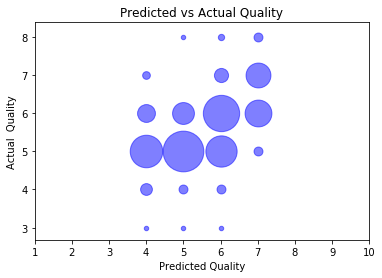

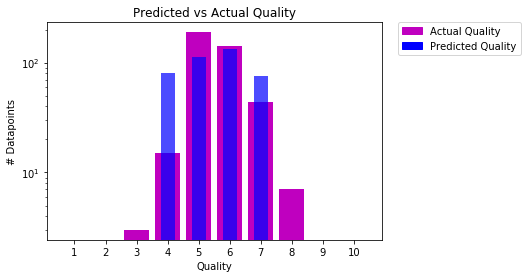


Mean squared error on training data: 0.83
Variance score (1 is perfect prediction): -0.21



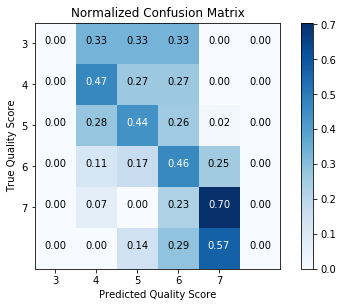

In [6]:
# Do oversampling on the data to give more diverse data
ros = RandomOverSampler(random_state = 0)
X_resample, y_resample = ros.fit_sample(X_train, y_train)

# Create & train the model
model = discriminant_analysis.QuadraticDiscriminantAnalysis()
model.fit(X_resample, y_resample)

# Make predictions on the test data
y_predictions = model.predict(X_test)
y_predictions = [round(y_predictions[i]) for i in range(len(y_predictions))]

# Make some magic happen
print_all_graphs(X_test, y_test, y_predictions, labels, 'Quality', 'red')    

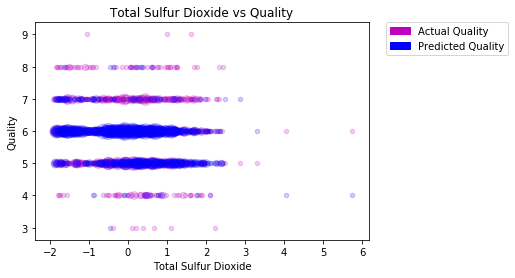

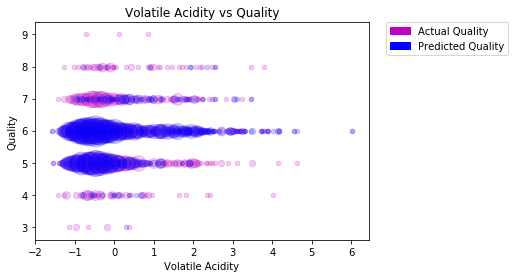

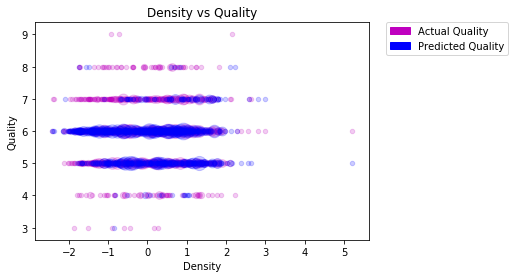

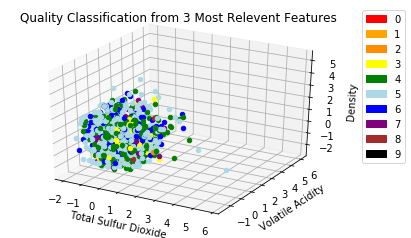

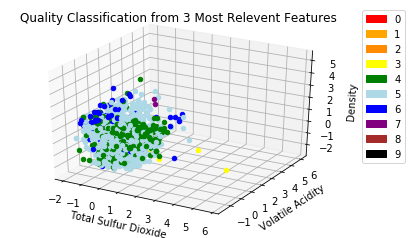

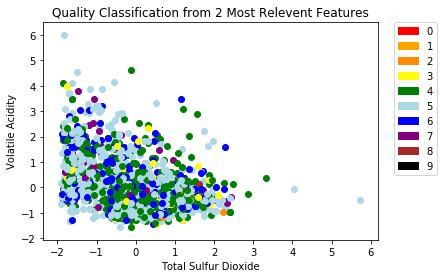

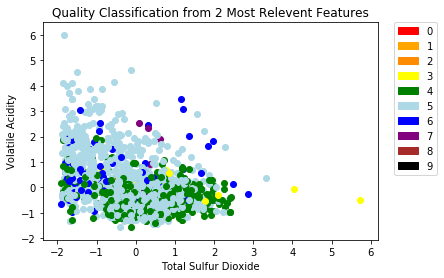

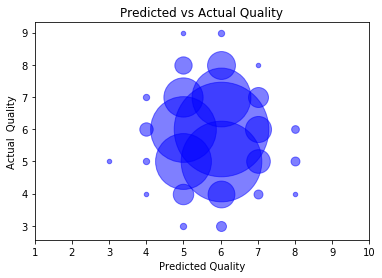

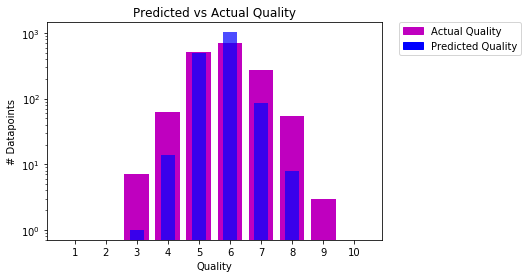


Mean squared error on training data: 1.15
Variance score (1 is perfect prediction): -0.44



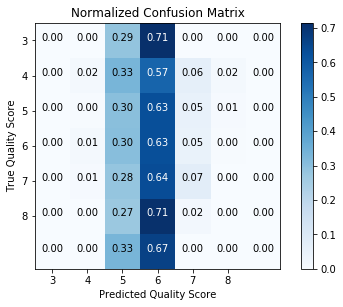

In [7]:
# Split up the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_quality)

# Create & train the model
model = discriminant_analysis.QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the test data
y_predictions = model.predict(X_test)
y_predictions = [round(y_predictions[i]) for i in range(len(y_predictions))]

# Make some magic happen
print_all_graphs(X_test, y_test, y_predictions, labels, 'Quality', 'both')    

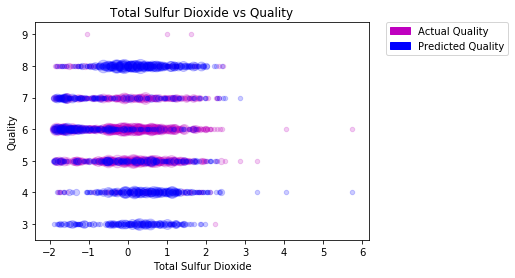

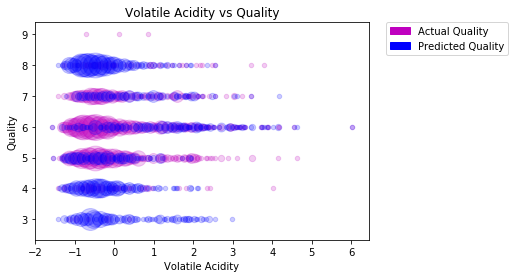

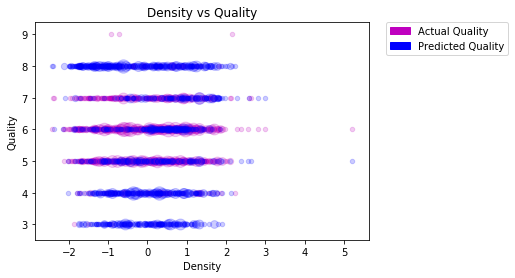

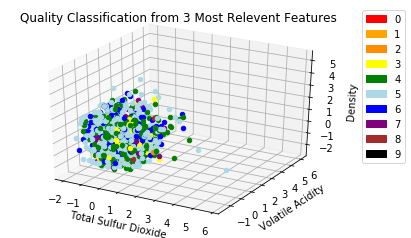

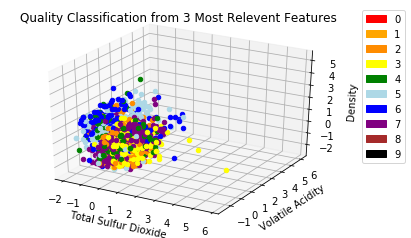

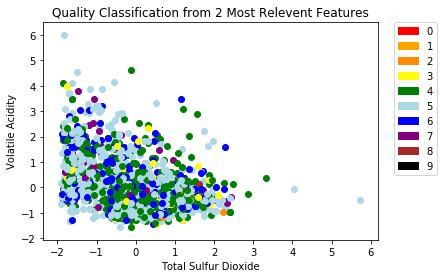

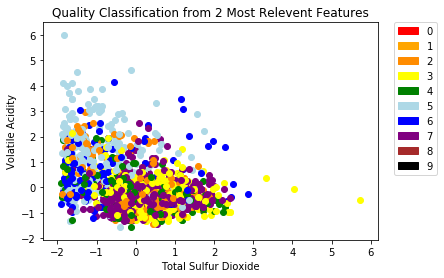

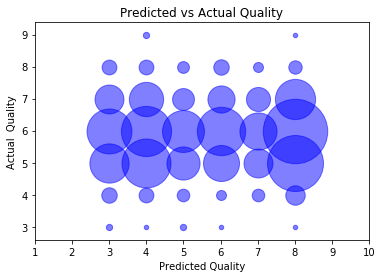

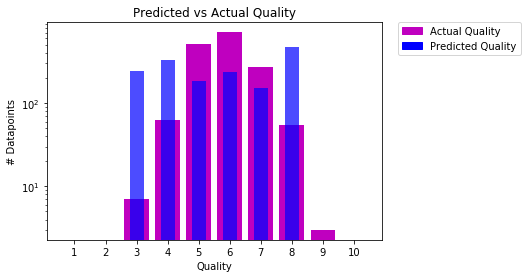


Mean squared error on training data: 4.29
Variance score (1 is perfect prediction): -4.34



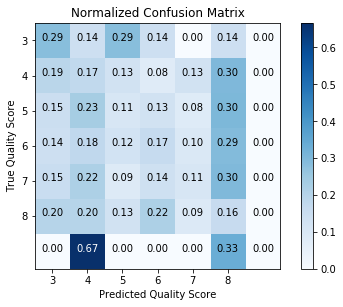

In [8]:
# Do oversampling on the data to give more diverse data
ros = RandomOverSampler(random_state = 0)
X_resample, y_resample = ros.fit_sample(X_train, y_train)

# Create & train the model
model = discriminant_analysis.QuadraticDiscriminantAnalysis()
model.fit(X_resample, y_resample)

# Make predictions on the test data
y_predictions = model.predict(X_test)
y_predictions = [round(y_predictions[i]) for i in range(len(y_predictions))]

# Make some magic happen
print_all_graphs(X_test, y_test, y_predictions, labels, 'Quality', 'both')    